In [913]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as sp

### Loading the dataset

In [1108]:
loan = pd.read_csv("loan.csv", index_col = False)

### Exploring the Dataset
###### Checking the top 5 rows
###### Percentage of Null values in each column
###### Cheking the shape of dataset

In [1109]:
## printing the shape of dataset
print(loan.shape)

(39717, 111)


In [1110]:
## Checking the type of each column
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [1111]:
## checking the top 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1112]:
## checking the percentage of null values in each column
percent_null = pd.DataFrame((loan.isnull().sum()/loan.shape[0])).reset_index().rename(columns = {"index":"column_name", 0:"percent"})
print(percent_null)

                        column_name   percent
0                                id  0.000000
1                         member_id  0.000000
2                         loan_amnt  0.000000
3                       funded_amnt  0.000000
4                   funded_amnt_inv  0.000000
5                              term  0.000000
6                          int_rate  0.000000
7                       installment  0.000000
8                             grade  0.000000
9                         sub_grade  0.000000
10                        emp_title  0.061913
11                       emp_length  0.027066
12                   home_ownership  0.000000
13                       annual_inc  0.000000
14              verification_status  0.000000
15                          issue_d  0.000000
16                      loan_status  0.000000
17                       pymnt_plan  0.000000
18                              url  0.000000
19                             desc  0.325805
20                          purpos

In [1113]:
## Getting Column Names who has more than 60% Null values
cols_to_delete = list(percent_null.loc[percent_null["percent"] > 0.6, "column_name"])
print(len(cols_to_delete), " Columns with more than 60% NUll values")
print(len(percent_null.loc[percent_null["percent"]>0.9, "column_name"]), " Columns with more than 90% NUll values")

57  Columns with more than 60% NUll values
56  Columns with more than 90% NUll values


In [1114]:
## Checking how many values are '0' in columns
all_zero = list(loan.loc[:,(loan == 0).all(axis=0)].columns)
print(len(all_zero), " Columns having all values 0")

2  Columns having all values 0


### Data Cleaning


In [1115]:
## Dropping all columns where Percentage of Null values are more than 60%
loan = loan.drop(columns=cols_to_delete)
print(loan.shape)

(39717, 54)


In [1116]:
## Dropping all columns who has all values equal to '0'
loan = loan.drop(columns=all_zero)

In [1117]:
## Checking the Shape
loan.shape
## We are left with 52 columns now

(39717, 52)

In [1118]:
## Checking the top 5 and last 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0


In [1119]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.0,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.0,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.0,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.0,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,0.0,Jun-10,256.59,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN


In [1120]:
### Checking how many Null values are still present in each column
(loan.isnull().sum()/loan.shape[0]) * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [1121]:
## 'Description' Column has lot of null values and they can't be imputed
## Dropping the 'desc' column as well
loan.drop("desc", axis=1, inplace= True)

In [1122]:
## Checking percentage of rows we are removing having even a single null value
(1 - loan.dropna(axis=0, how="any").shape[0]/loan.shape[0]) * 100
## We only lose around 8% data if we drop all rows having even a single null value.
## So, we are not losing much data. Hence we can continue with strategy.

8.273535261978493

In [1123]:
## Dropping rows even if they have one Null value
loan = loan.dropna(axis=0, how="any")

In [1124]:
loan.shape

(36431, 51)

In [1125]:
## Again cheking if there are any columns which has only '0' as value
print(loan.loc[:,(loan == 0).all(axis=0)].columns)
## The below 3 columns will not contribute anything in analysis since there is no variation

Index(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], dtype='object')


In [1126]:
## Dropping the above 3 columns
loan = loan.drop(list(loan.loc[:,(loan == 0).all(axis=0)].columns), axis=1)

In [1127]:
## Checking unique values of oan status
loan["loan_status"].value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [1128]:
## Now we don't need data for people who are currently paying the loan since we can't do analysis on those people
## So removing rows where 'loan_status' is 'Current'
loan = loan.loc[loan["loan_status"] != "Current",:]

In [1129]:
## Checking the final shape after all cleaning
loan.shape

(35365, 48)

### Data Cleaning  and Exploration Summary

1.) There are `56` columns having more than `90%` Null Values

2.) Dropped columns with more than `60%` Null Values ( `57 Columns`)

3.) Dropped description column (`desc`) 

4.) Dropped all rows with one or more than one null values

5.) After above steps, we removed `8.27%` of rows

6.) Once we removed rows we get 3 extra columns having all values equal to 0

7.) Dropping these 3 columns as well there are `48 columns left`

8.) We can't do any analysis on the people who are currently payinh the loan. So, removed the rows where `loan_status` is `Current`

8.) So, we are left with `35365 rows and 48 Columns` for further analysis

### Starting with EDA

###### Checking number of unique values in each column. If there is only 1 unique value for a column, that means the column is insignificant

In [998]:
## Checking the number of unique values in each column
for i in loan.columns:
    
    print(i, " : ", loan[i].nunique())

id  :  35365
member_id  :  35365
loan_amnt  :  847
funded_amnt  :  1001
funded_amnt_inv  :  7324
term  :  2
int_rate  :  333
installment  :  14026
grade  :  7
sub_grade  :  35
emp_title  :  27412
emp_length  :  11
home_ownership  :  4
annual_inc  :  4830
verification_status  :  3
issue_d  :  51
loan_status  :  2
pymnt_plan  :  1
url  :  35365
purpose  :  14
title  :  17660
zip_code  :  804
addr_state  :  48
dti  :  2842
delinq_2yrs  :  11
earliest_cr_line  :  509
inq_last_6mths  :  9
open_acc  :  38
pub_rec  :  5
revol_bal  :  20351
revol_util  :  1081
total_acc  :  79
initial_list_status  :  1
out_prncp  :  1
out_prncp_inv  :  1
total_pymnt  :  33738
total_pymnt_inv  :  33464
total_rec_prncp  :  6192
total_rec_int  :  31468
total_rec_late_fee  :  1163
recoveries  :  3584
collection_recovery_fee  :  2386
last_pymnt_d  :  97
last_pymnt_amnt  :  31984
last_credit_pull_d  :  96
policy_code  :  1
application_type  :  1
pub_rec_bankruptcies  :  3


In [999]:
## Looks like there are few columns which have only 1 unique value. 
## Lets drop these since they will not add any information in our analysis

for i in loan.columns:
    
    if loan[i].nunique() == 1:
        
        loan.drop(i, axis=1, inplace= True)

In [1000]:
## Printing the shape of loan data set
loan.shape

(35365, 42)

In [1001]:
## Dropping the ID columns as well since they can't be used for our analysis:
loan.drop(["id", "member_id"], axis=1, inplace= True)

##### After further cleaning, the data available for analysis has `35365` rows and `42` columns

In [1002]:
## Separating categorical and contiuous variables
cat_cols = []
cont_cols = []
for i in loan.columns:
    
    if loan[i].nunique() < 15 or loan[i].dtype == "object":
        
        cat_cols.append(i)
        
    else:
        
        cont_cols.append(i)

### Starting with Uniavariate and  Bivariate Analysis and checking how each variable impacts Target column

##### Lets check what's the frequency in dependent variable `loan_status`

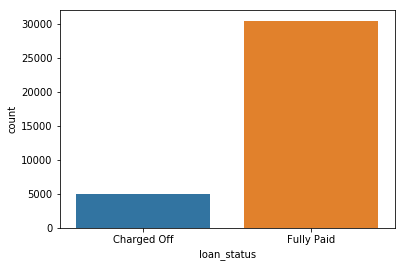

In [1003]:
sns.countplot(loan["loan_status"])
plt.show()
## This shows the data is highly skewed. People who default are way less as compared to people who pays full loan

In [1174]:
## Charged off : Default : 1
## Fully Paid : loan completed : 0
# loan["loan_status"] = loan["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0)
loan["loan_status"] = loan["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0)
# loan["loan_status"] = loan["loan_status"].astype("category")

### Impact of `term` on `loan_status`

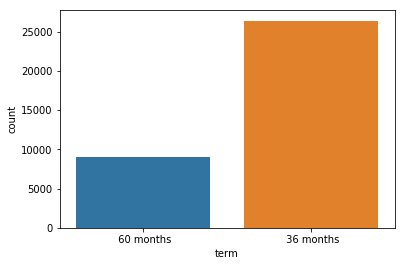

In [1005]:
## Let's plot this variable
sns.countplot(x = loan["term"])
plt.show()

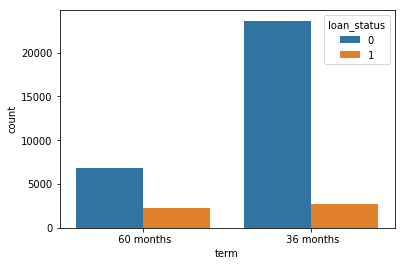

In [1006]:
## Checking the impact of loan term on loan_status
sns.countplot("term", data=loan, hue="loan_status")
plt.show()

###### The tenure doesn't have any significant impact on `loan status`. For both 36 and 60 months tenure, number of defaulters are alomst same.
###### But if we see as total, the number of loans given for 36 months are much higher than 60 months

### Impact of  `annual_inc` on `loan_status`

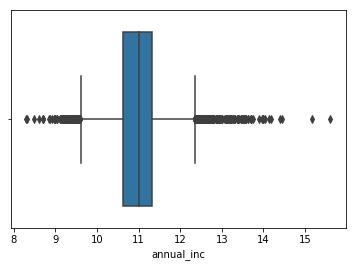

In [1008]:
## Checking the annual income if it has outliers or not
sns.boxplot(np.log(loan["annual_inc"]))
plt.show()

In [1010]:
## Lets check the percentile values for annual income
print(np.percentile(loan["annual_inc"], q=95))
## 95 percent of people have annual income band less than 140K, Lets limit this variable upto 140k and do analysis on that

140000.0


In [1012]:
## Lets analyize the data upto 95% percentile since there is lot of outliers
loan_temp = loan.loc[loan["annual_inc"] < 140000, :]
print(loan_temp.shape)

(33502, 40)


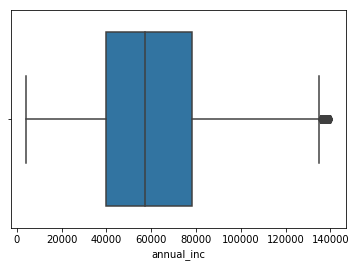

In [1014]:
## Checking the annual income in filtered data if it has outliers or not
## There are very few outliers present now
sns.boxplot(loan_temp["annual_inc"])
plt.show()

In [1015]:
np.mean(loan_temp["annual_inc"])

61146.322387021646

In [1017]:
## creating annual income band
loan_temp["inc_band"] = loan_temp["annual_inc"].apply(lambda x: "<62k" if x < 62000 else ">=62k")
temp = loan_temp.loc[loan_temp.loan_status == 1, ["inc_band", "loan_status"]]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


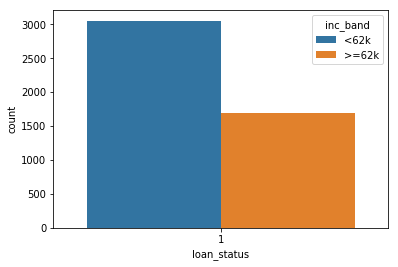

In [1019]:
## Checking the impact of annual income on loan_status
sns.countplot(x="loan_status", data=temp, hue= "inc_band")
plt.show()

###### From the above plot it is quite clear that  most of the defaulters lie in income range less than 62K. 
###### Hence `annual income` is one of the significant factors to check while providing loan

### Checking impact of `total payment done including interest` on `loan_status`

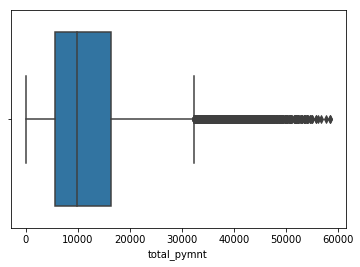

In [1028]:
## Checking the outliers and median for "total_paymt" variable
sns.boxplot(loan["loa"])
# sns.boxplot(loan["total_rec_int"])
plt.show()
## There are outliers so checking the median and creating the slab for this column

In [1032]:
## Calculating median
a = np.median(loan["total_pymnt"])
# a = np.median(loan["total_rec_int"])
print("The median of `total_pymt` received is: ", round(a))


The median of `total_pymt` received is:  9866.0


In [1033]:
## creating bin for this column
loan["tot_pmt_temp"] = loan.total_rec_int.apply(lambda x: 1 if x <= a else 0)
## 1 represent total amount less than 9865 (median) or 114%
## 0 represent total amount more than 9865 (median) or 114%
temp = loan.loc[loan.loan_status == 1, ["tot_pmt_temp", "loan_status"]]

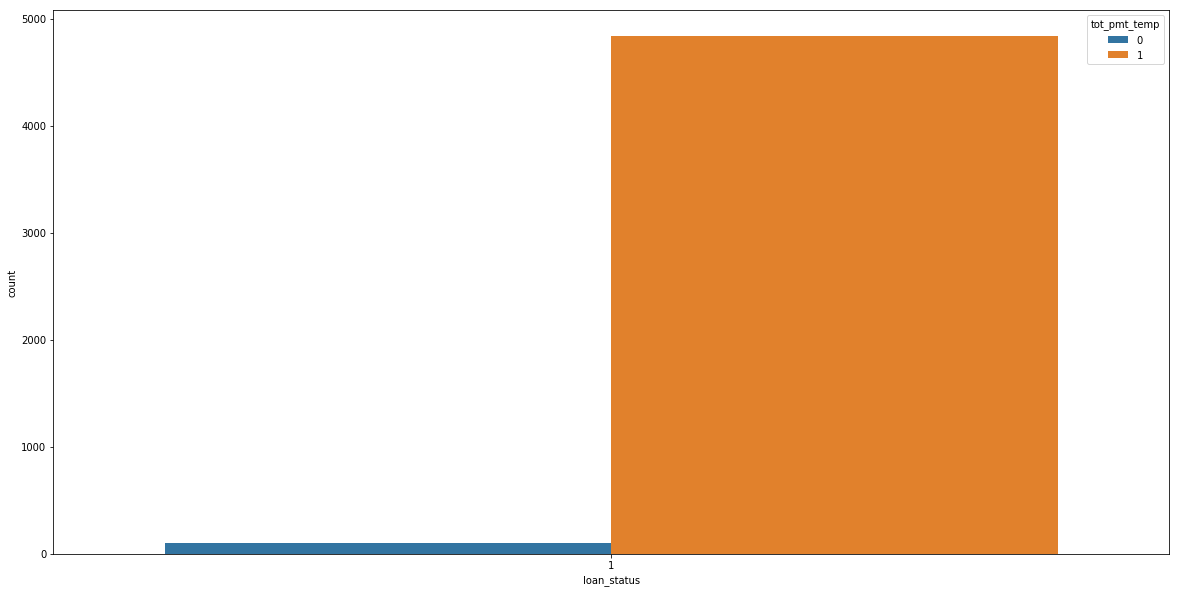

In [1034]:
## Checking the impact
plt.figure(figsize=(20,10))
sns.countplot(data=temp, x = "loan_status", hue = "tot_pmt_temp")
plt.show()

###### From above analysis we can't whether a loan should be given or not.

###### But if a person has paid less than median amount (9865), they should be under scanner if they are regularly paying or not

### Checking impact of `Interest rate` on `loan_status`

In [1039]:
## Cleaning the int_rate column
loan["int_rate"] = loan["int_rate"].apply(lambda x: float(x.replace("%", "")))
loan['int_rate'] = pd.to_numeric(loan['int_rate'])

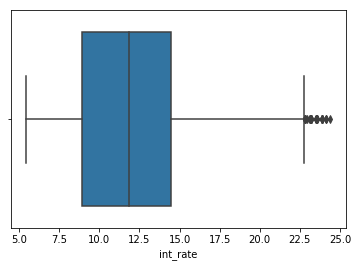

In [1040]:
## Checking the outliers
sns.boxplot(loan["int_rate"])
plt.show()
## There are not many outliers present in `int_rate` column

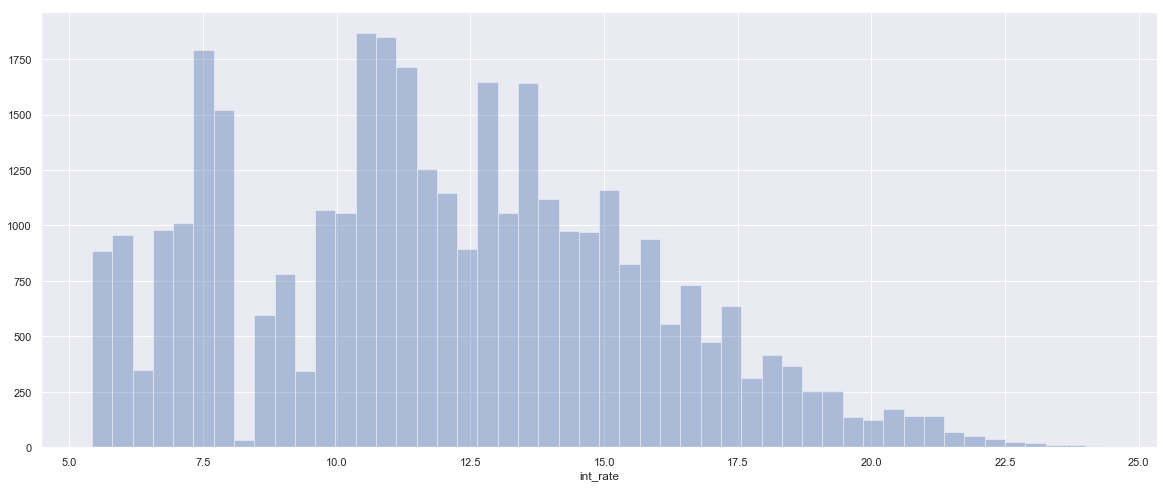

In [1057]:
## Checking the distribution of interest rate
sns.distplot(loan["int_rate"], kde= False)
plt.show()

##### This shows that most of the population lies within 20% range

In [1044]:
## Creating the bins for interest rate
breaks = [5,10,15,20,25]
groups = ["5-10","10-15","15-20","20-25"]
loan['Int_Rate_Range'] = pd.cut(loan['int_rate'],breaks,labels=groups)
loan_Int_Rate_Group = loan.groupby(by="Int_Rate_Range").agg({"loan_status":"sum"}).reset_index()

In [1054]:
## Calculating the percentage of defaulters in each band
percentage1 = (loan_Int_Rate_Group.loc[0,'loan_status']/loan[loan['Int_Rate_Range'] == "5-10"].shape[0])*100
percentage2 = (loan_Int_Rate_Group.loc[1,'loan_status']/loan[loan['Int_Rate_Range'] == "10-15"].shape[0])*100
percentage3 = (loan_Int_Rate_Group.loc[2,'loan_status']/loan[loan['Int_Rate_Range'] == "15-20"].shape[0])*100
percentage4 = (loan_Int_Rate_Group.loc[3,'loan_status']/loan[loan['Int_Rate_Range'] == "20-25"].shape[0])*100
percentage = [percentage1,percentage2,percentage3,percentage4]
loan_Int_Rate_Group['Defaut_Percentage'] = percentage

Text(0.5, 1.0, 'Impact of Interest Rate')

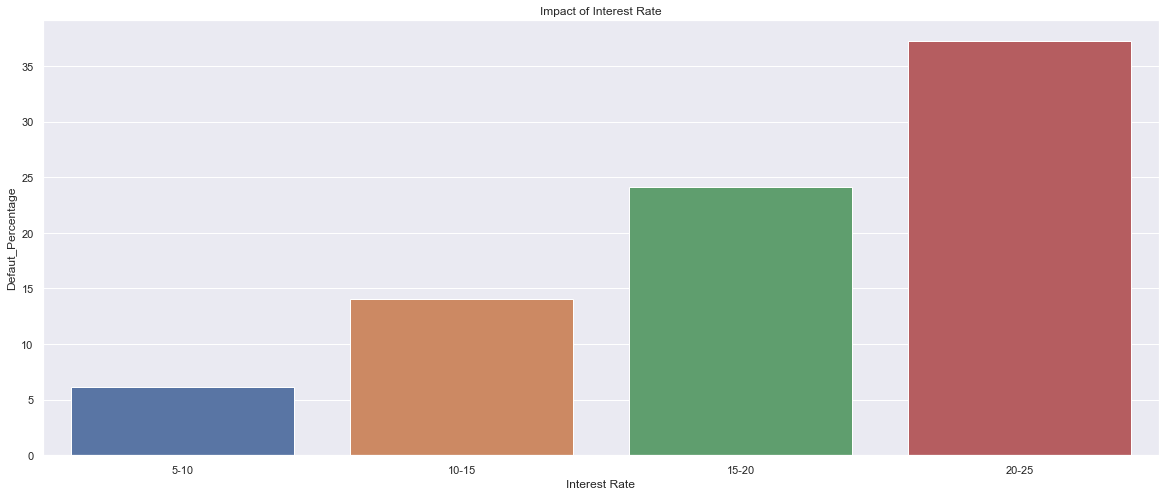

In [1056]:
sns.set(rc={'figure.figsize':(20,8)})
plot = sns.barplot(x="Int_Rate_Range", y="Defaut_Percentage",data=loan_Int_Rate_Group);
plot.set(xlabel='Interest Rate', ylabel='Defaut_Percentage')
plt.title("Impact of Interest Rate")

##### From above its quite clear that as interest rate increases, chance that people will default on their loan increases.

##### Although its possible that there might be very less applicants in the last two bands, but the chances of default are very high in that range



### Checking impact of `Employment Experience` on `loan_status`

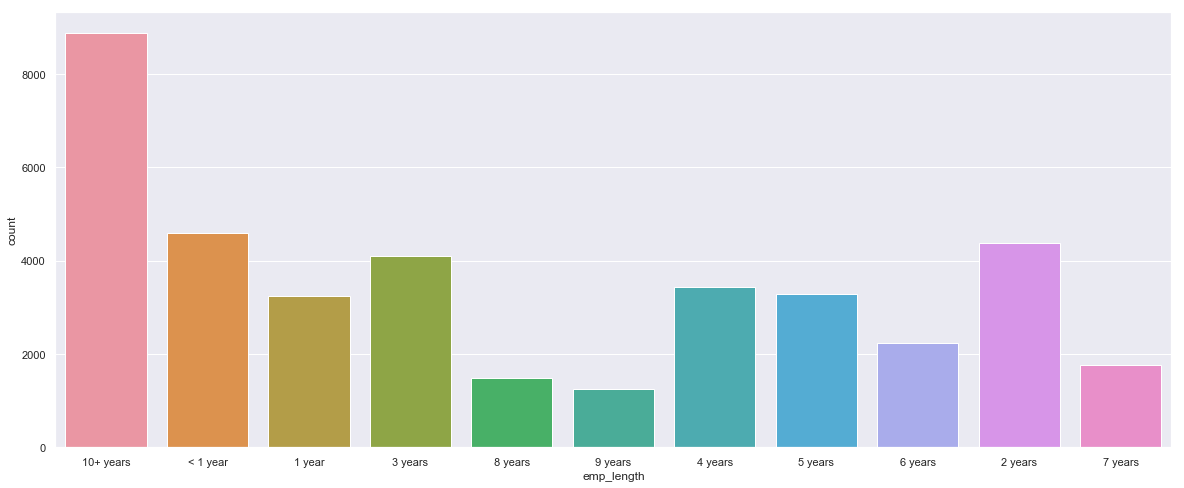

In [1069]:
## Exploring the columns
sns.countplot(loan["emp_length"])
plt.show()

In [1134]:
## Lets clean the column 
loan["emp_length"] = loan["emp_length"].apply(lambda x: str(x).replace("years", "").replace("year", ""))

In [1164]:
loan["emp_length"] = loan["emp_length"].apply(lambda x: str(x).replace("< ", "").replace("+",""))
loan["emp_length"] = pd.to_numeric(loan["emp_length"])

In [1167]:
## Binning of 'Year Experience' column.
bins = [1,5,9,10]
groups = ["1-5","5-9", "9+"] 
loan['exp_range'] = pd.cut(loan['emp_length'],bins,labels=groups)

In [1182]:
## Filtering the values where loan_status is 1
temp = loan[loan['loan_status'] == 1]
temp_data = temp.groupby("exp_range").agg({"loan_amnt":"mean"}).reset_index()
temp_1 = temp.pivot_table(values = 'loan_status',index = 'exp_range',aggfunc='sum').reset_index()
percentage1 = (temp_1.loc[0,'loan_status']/loan[loan['exp_range'] == "1-5"].shape[0])*100
percentage2 = (temp_1.loc[1,'loan_status']/loan[loan['exp_range'] == "5-9"].shape[0])*100
percentage3 = (temp_1.loc[2,'loan_status']/loan.loc[loan['exp_range'] == "9+"].shape[0])*100
temp_data['Def_Percent'] = [percentage1,percentage2,percentage3]
temp_data

,exp_range,loan_amnt,Def_Percent
0,1-5,11369.059536,13.401116
1,5-9,12831.414662,13.997114
2,9+,14624.776967,15.358744


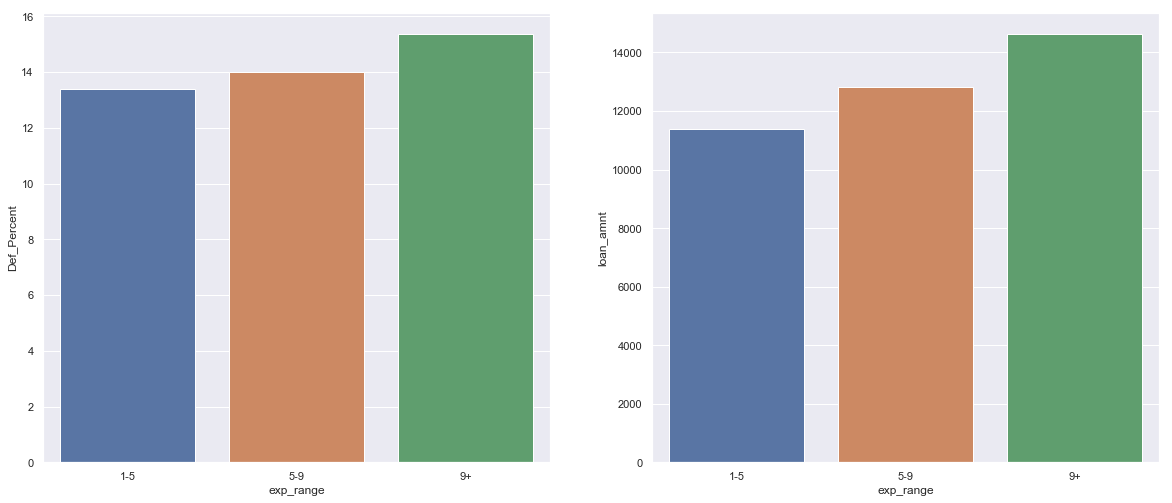

In [1183]:
#subplot 1: 
plt.subplot(1, 2, 1)
sns.barplot(x='exp_range', y='Def_Percent', data=temp_data)
plt.gcf().set_size_inches(20, 8.27)
# subplot 2:
plt.subplot(1, 2, 2)
sns.barplot(x='exp_range', y='loan_amnt', data=temp_data)
plt.show()

##### From above graphs its clear that as the number of years of experience in employment increases, people take high amount of loans and their 

##### chance of defualt increases simultaneously

### Checking impact of `DTI` on `loan_status`

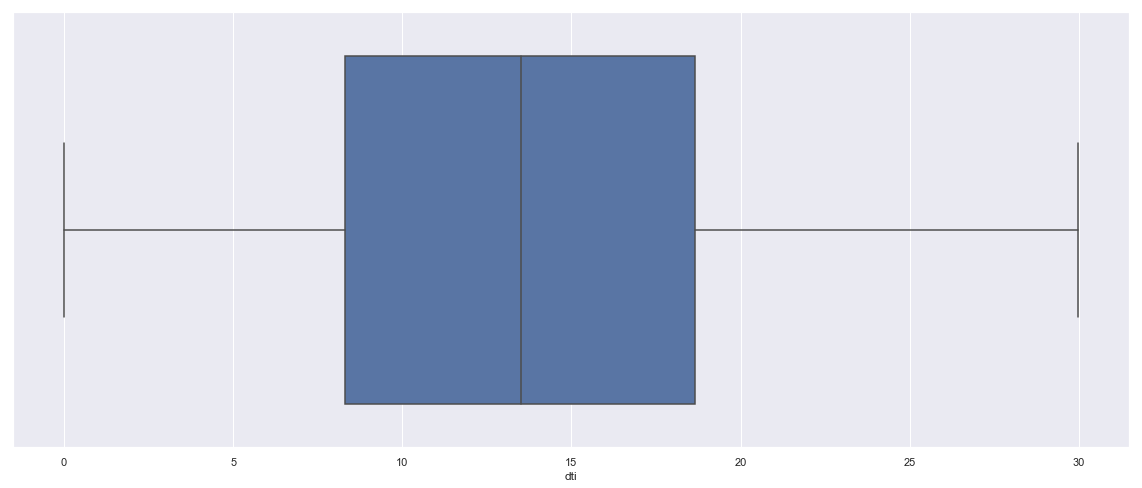

In [1187]:
## Exploring the column
sns.boxplot(loan["dti"])
plt.show()
## Looks like there are no outliers in this column

In [1190]:
## Creating bins for this column
bins = [0,10, 20, 30]
groups =["0-10","10-20","20-30"]
loan['DTI_Range'] = pd.cut(loan['dti'],bins,labels=groups)

In [1192]:
dti = loan[['DTI_Range','loan_status']].groupby(by="DTI_Range",sort=True).sum().reset_index()
Range1Len = loan[loan['DTI_Range'] == "0-10"].shape[0]
Range2Len = loan[loan['DTI_Range'] == "10-20"].shape[0]
Range3Len = loan[loan['DTI_Range'] == "20-30"].shape[0]
Percentage1 = (dti.loc[0,'loan_status']/Range1Len)*100
Percentage2 = (dti.loc[1,'loan_status']/Range2Len)*100
Percentage3 = (dti.loc[2,'loan_status']/Range3Len)*100
Percentage = [Percentage1,Percentage2,Percentage3]
dti['Default_Percentage'] = Percentage

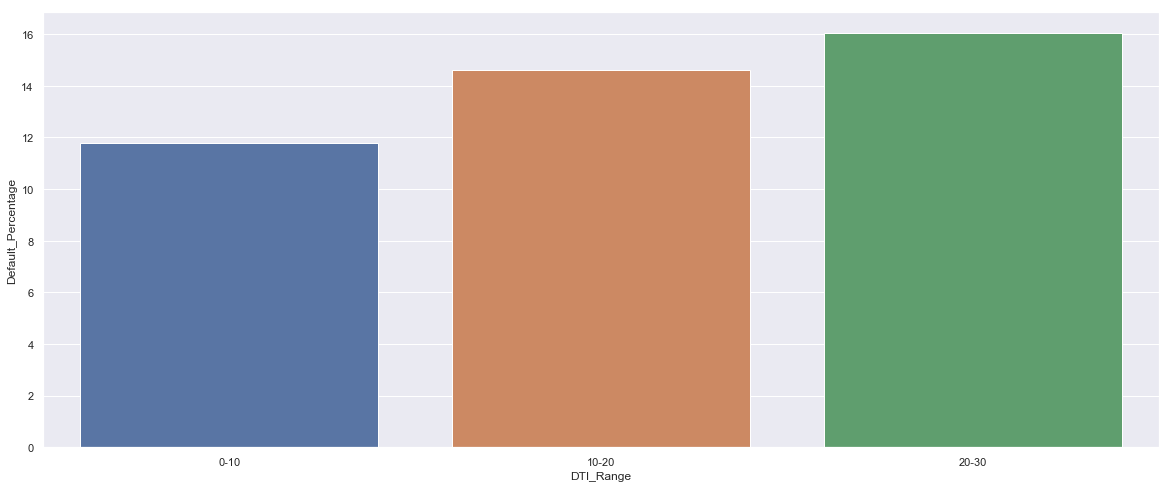

In [1194]:
sns.barplot(y ='Default_Percentage',x = 'DTI_Range', data = dti)
plt.show()

### Checking impact of `Revolutil` on `loan_status`

In [1198]:
## Cleaning the column data
loan["revol_util"] = loan["revol_util"].apply(lambda x: str(x).replace("%", ""))
loan["revol_util"] = pd.to_numeric(loan["revol_util"])

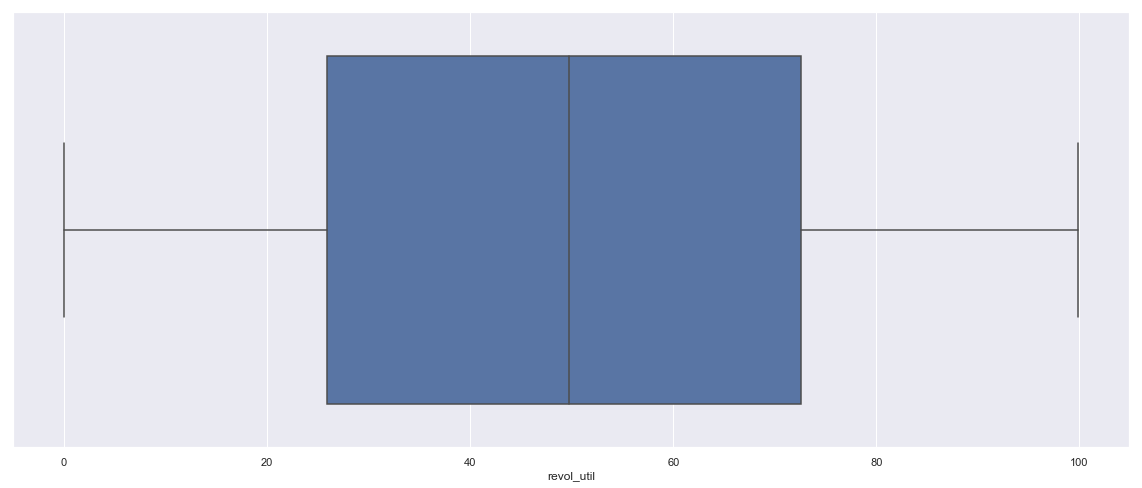

In [1200]:
## Exploring the column
sns.boxplot(loan["revol_util"])
plt.show()
## Looks like there are no outliers in this column

In [1201]:
## Creating bins for this column to analyze the impact
bins=[0,20,40,60,80,100]
groups = ["0-20","20-40","40-60","60-80","80-100"]
loan['RevolUtilGrp'] = pd.cut(loan['revol_util'],bins,labels=groups)
util = loan.groupby(by="RevolUtilGrp",sort=True).sum().reset_index()

In [1204]:
percentage1 = (util.loc[0,'loan_status']/loan.loc[loan['RevolUtilGrp'] == "0-20"].shape[0])*100
percentage2 = (util.loc[1,'loan_status']/loan.loc[loan['RevolUtilGrp'] == "20-40"].shape[0])*100
percentage3 = (util.loc[2,'loan_status']/loan.loc[loan['RevolUtilGrp'] == "40-60"].shape[0])*100
percentage4 = (util.loc[3,'loan_status']/loan.loc[loan['RevolUtilGrp'] == "60-80"].shape[0])*100
percentage5 = (util.loc[4,'loan_status']/loan.loc[loan['RevolUtilGrp'] == "80-100"].shape[0])*100
util['Default_percentage'] = [percentage1,percentage2,percentage3,percentage4,percentage5]

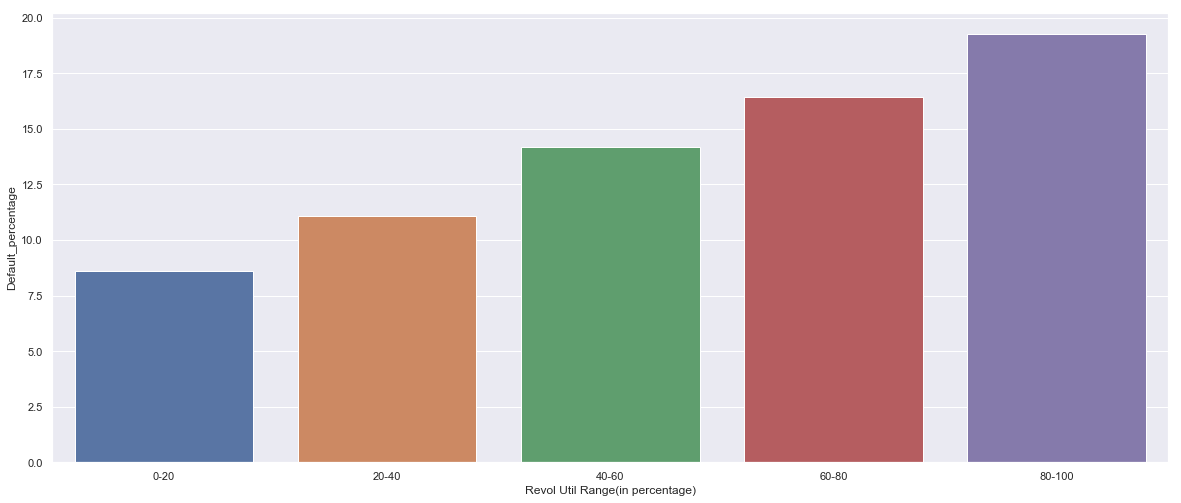

In [1205]:
plot = sns.barplot(x='RevolUtilGrp', y='Default_percentage', data=util)
plt.gcf().set_size_inches(20, 8.27)
plot.set(xlabel='Revol Util Range(in percentage)', ylabel='Default_percentage')
plt.show()

##### Its quite clear that the percentage of `revol_util` increases, number of defualters also increase. And its obvious because it is said that

##### value of revol_util above 30% is not considered good

### Checking impact of `addr_state` on `loan_status`

In [853]:
## Calculating total number of loans in each state
tot_num_app = loan.groupby("addr_state").agg({"loan_status":"count"}).reset_index()
tot_num_app.rename(columns = {"loan_status": "frequency_total"}, inplace = True)

In [1215]:
tot_num_app.sort_values(by="frequency_total", ascending= False).head()
## This shows top 5 states by total number of loans

,addr_state,frequency_total
4,CA,6396
31,NY,3386
9,FL,2535
40,TX,2453
28,NJ,1667


In [854]:
loan_addr = loan.groupby("addr_state").agg({"loan_status":"sum"}).reset_index()
loan_addr = loan_addr.rename(columns = {"loan_status":"frequency"})

In [1216]:
loan_addr.sort_values(by="frequency", ascending= False).head()
## This shows top 5 states by number of defualters

,addr_state,frequency
4,CA,976
31,NY,438
9,FL,437
40,TX,273
28,NJ,256


#### Interestingly, Top 5 states with highest number of loans are same as states with highest number of defaulters

In [1217]:
## Merging bith the data frames
final_addr = tot_num_app.merge(loan_addr, how= "inner", left_on= "addr_state", right_on="addr_state")

In [1218]:
## calculating percentage of defaulters in each state
final_addr["percent_default_each_state"] = (final_addr["frequency"]/final_addr["frequency_total"]) * 100

In [1219]:
final_addr = final_addr.sort_values(by="percent_default_each_state",ascending= False).iloc[0:20,:]

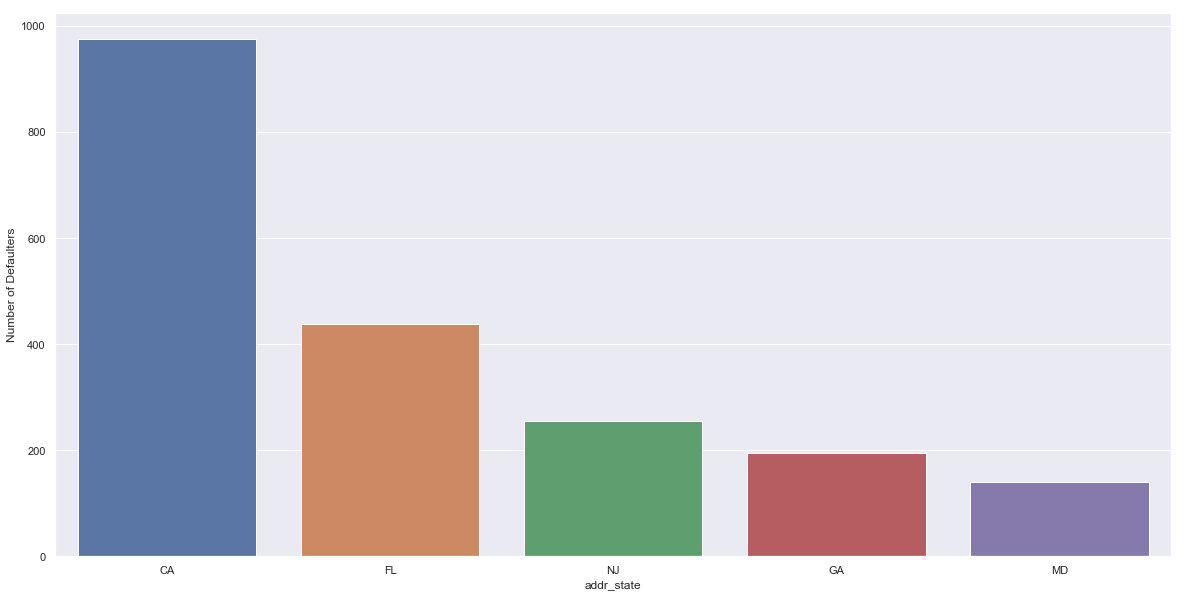

In [1220]:
## Analyzing by total number of defualters
temp = final_addr.sort_values(by="frequency",ascending= False).iloc[0:5,:]
plt.figure(figsize= (20,10))
sns.barplot(x = "addr_state", y= "frequency", data= temp)
plt.ylabel("Number of Defaulters")
plt.show()
## Below graph shows top 10 states having most number of defaulters

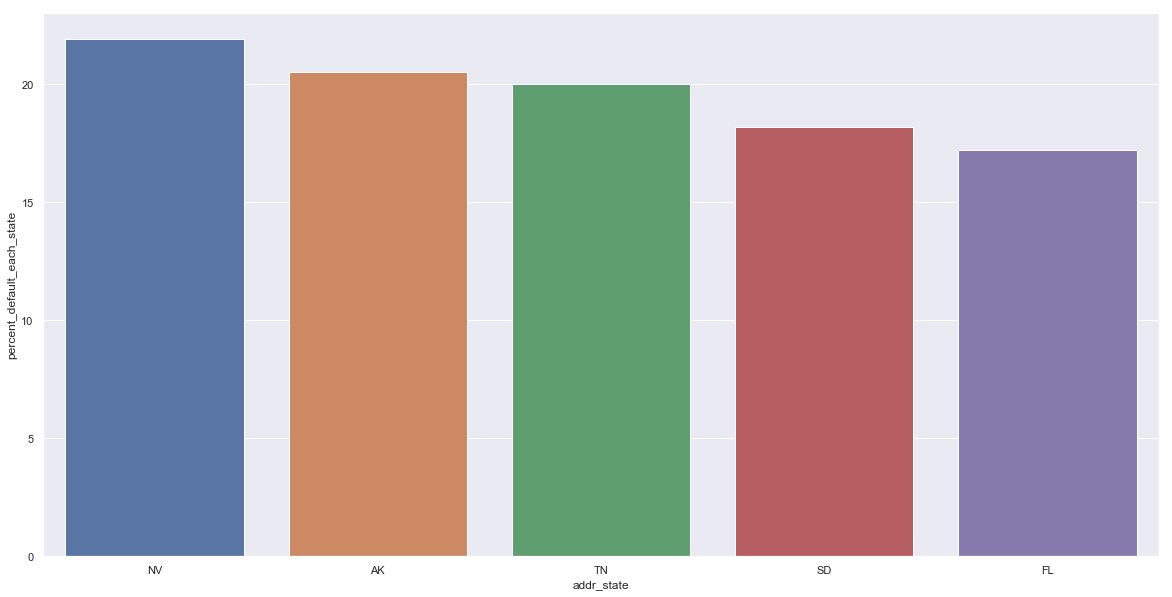

In [1221]:
## Analyzing by percentage of defaulters out of total application in each state
temp = final_addr.sort_values(by="percent_default_each_state",ascending= False).iloc[0:5,:]
plt.figure(figsize= (20,10))
sns.barplot(x = "addr_state", y= "percent_default_each_state", data= temp)
plt.show()
## Below graph shows top 10 states having most number of defaulters

##### These are major points which can be noted from above:

1.) First graph shows the top 5 states by number of defaulters in each state while the second graph shows proportion of defaulters out of total loans taken in each state. The states in first graph are also the one which has most number of loans

2.) The top 10 states by proportion of defaulters are different than the top 5 states with most number of defualters

3.) `Florida` is common in both the above graphs. So, lenders should be careful for the people coming from both states

### Checking the impact of `Number of derogatory records` on ` loan_status`

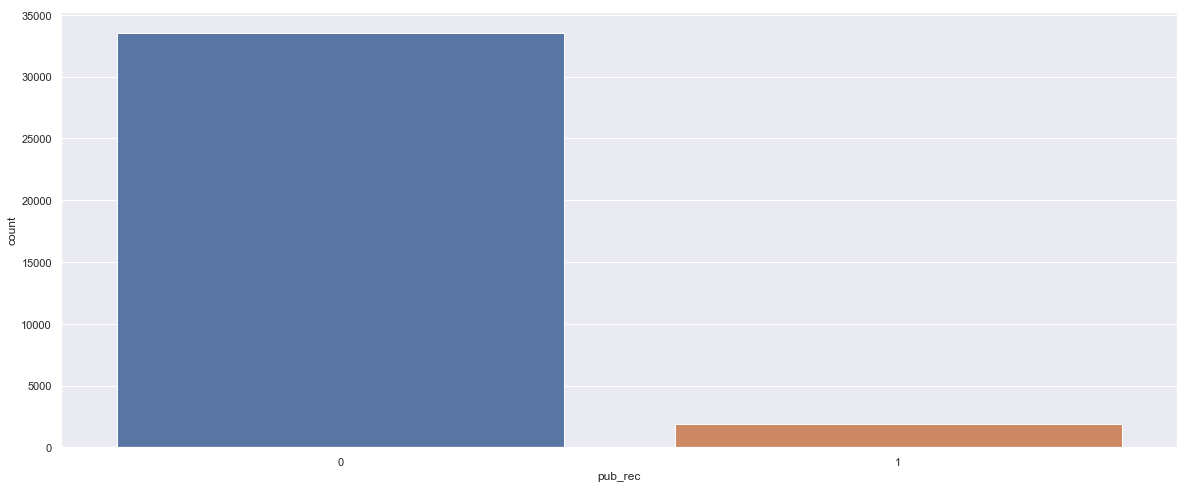

In [1242]:
## Exploring the column
sns.countplot(loan["pub_rec"])
plt.show()
## Tha data is lot skewed. Lets see if the proportion of defaulters tell anything

In [1243]:
## changing the column values
## Except '0' merging all other values and making it as `1`
loan["pub_rec"] = loan["pub_rec"].apply(lambda x: 0 if x == 0 else 1)

In [1229]:
temp = loan.loc[:, ["loan_status", "pub_rec"]]
temp = temp.groupby("pub_rec").agg({"loan_status":"sum"}).reset_index()
temp["def_per"] = (temp["loan_status"]/loan.shape[0])*100

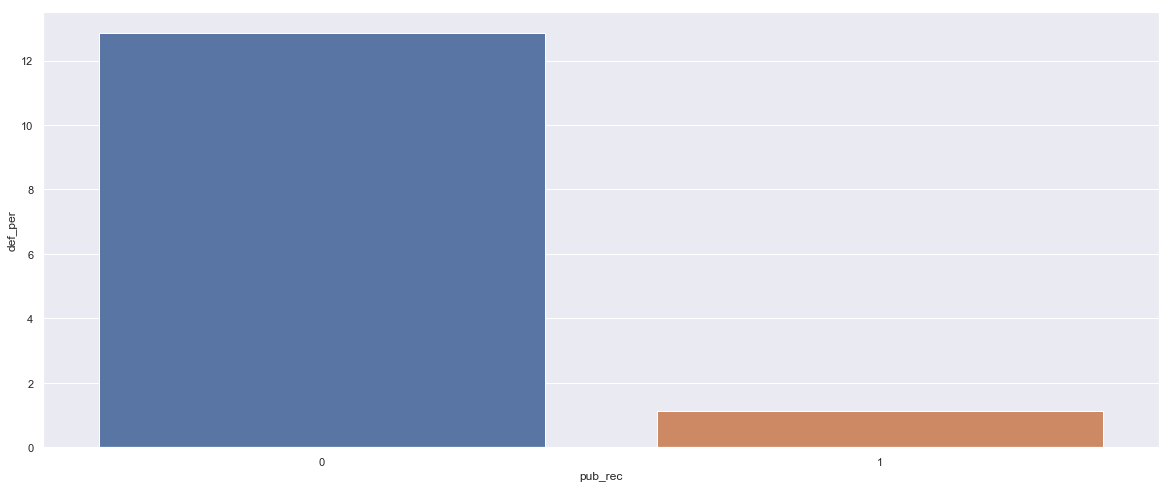

In [1246]:
## Plotting the percentage of defaulters
sns.barplot(x = "pub_rec", y = "def_per", data = temp)
plt.show()

##### We can't draw any conclsuion from above graph since the number of loans under `pub_rec = 1` are  very less. Hence its an insignificant variable

### Checking the impact of  `Duration of loan ( in which loan is paid or defaulted)` on `loan_status`

In [1253]:
## Calculation of number of months the emis are paid
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['dur_months'] = ((loan['last_pymnt_d']-loan['issue_d'])/np.timedelta64(1, 'M')).round()
loan['dur_months'] = loan['dur_months'].astype(int)

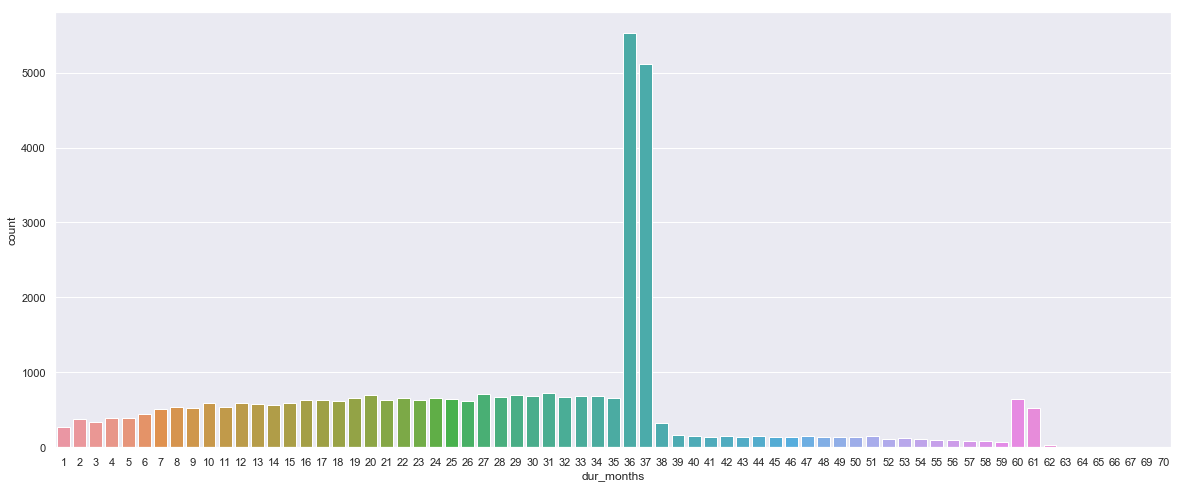

In [1249]:
## Exploring this column
sns.countplot(loan['dur_months'])
plt.show()

##### This makes sense since most of loans were taken for `36 months`.
##### Creating band helps in analysing this kind of data

In [1255]:
bins=[0,12,24,36,48,60]
groups = ["0-12","12-24","24-36","36-48","48-60"]
loan['dur_months'] = pd.cut(loan['dur_months'],bins,labels=groups)
dur = loan.pivot_table(values = 'loan_status',index='dur_months',aggfunc='sum')
dur = dur.reset_index()
dur

,dur_months,loan_status
0,0-12,1688
1,12-24,1709
2,24-36,1073
3,36-48,353
4,48-60,117


In [1262]:
## Calculating percentage
per_1 = dur.loc[0, "loan_status"] / loan[loan["dur_months"] == "0-12"].shape[0]
per_2 = dur.loc[1, "loan_status"] / loan[loan["dur_months"] == "12-24"].shape[0]
per_3 = dur.loc[2, "loan_status"] / loan[loan["dur_months"] == "24-36"].shape[0]
per_4 = dur.loc[3, "loan_status"] / loan[loan["dur_months"] == "36-48"].shape[0]
per_5 = dur.loc[4, "loan_status"] / loan[loan["dur_months"] == "48-60"].shape[0]
per = [per_1, per_2, per_3, per_4, per_5]
dur["percent_default"] = per
dur["percent_default"] = dur["percent_default"] * 100

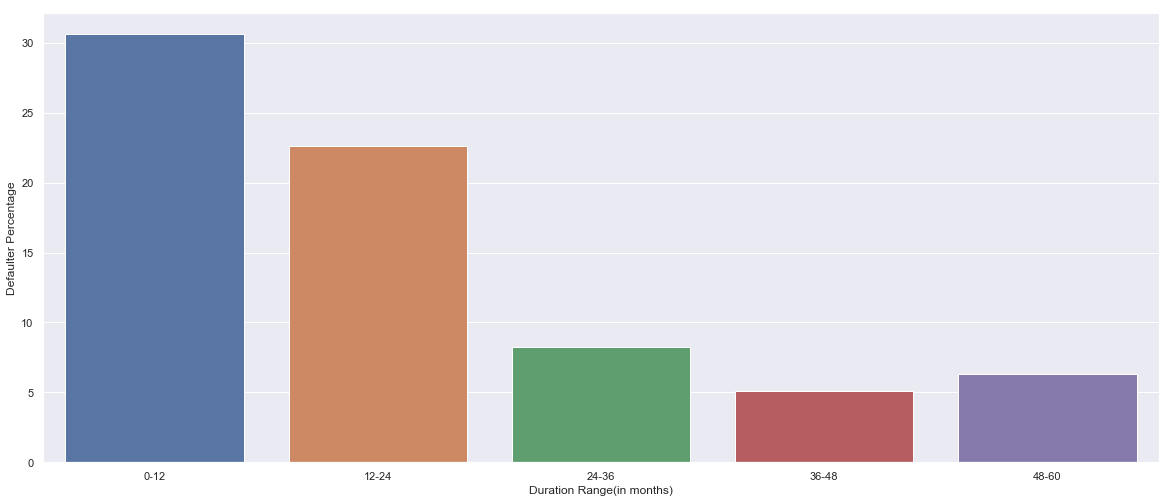

In [1264]:
## Plotting the percentages
plot = sns.barplot(x='dur_months', y='percent_default', data=dur)
plt.gcf().set_size_inches(20, 8.27)
plot.set(xlabel='Duration Range(in months)', ylabel='Defaulter Percentage')
plt.show()

##### From above analysis, its clear that people generally default during the period of `0-24 months`

#### If they continue paying beyond this duration chances of going to default `decreases`

##### We can't tell anything from last bar since the data for that duration is very less

### Checking the impact of `Purpose of Loan` on getting default

In [1276]:
## checking the column values
(loan["purpose_new"].value_counts()/loan.shape[0])*100

debt_consolidation    47.812809
others                23.950233
credit_card           13.080730
home_improvement       7.391489
car                    3.944578
small_business         3.820161
Name: purpose_new, dtype: float64

In [1285]:
## Looking at above values, we should perform some consolidation here
## Let's put `debt_consolidation`, `credit_card`, `small_business`, `car` and rest everything as `others`
loan["purpose_new"] = loan["purpose"].apply(lambda x: "others" if x not in ["debt_consolidation", "credit_card", "home_improvement", "car", "small_business"] else x)

In [1291]:
temp = loan.groupby("purpose_new").agg({"loan_status":"sum"}).reset_index()
temp["total_loans"] = loan.groupby("purpose_new").agg({"loan_status":"count"}).reset_index().loc[:, "loan_status"]
temp["default_percent"] = (temp["loan_status"]/temp["total_loans"]) *100

In [1292]:
temp

,purpose_new,loan_status,total_loans,default_percent
0,car,149,1395,10.681004
1,credit_card,479,4626,10.354518
2,debt_consolidation,2508,16909,14.832338
3,home_improvement,296,2614,11.323642
4,others,1154,8470,13.624557
5,small_business,356,1351,26.350851


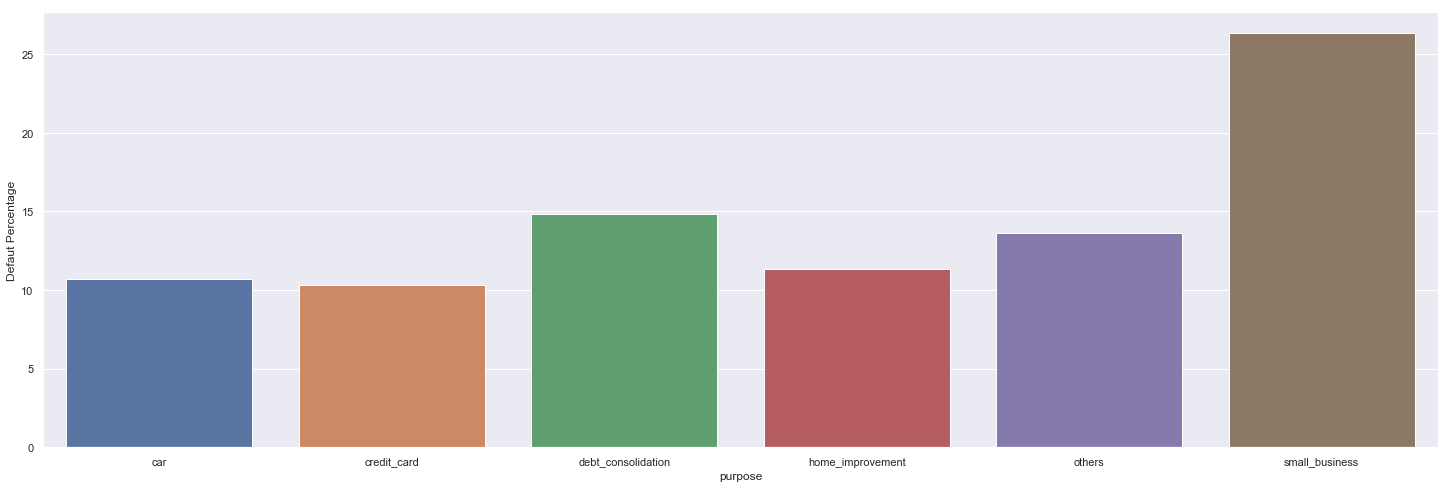

In [1295]:
## Plotting the above data set
sns.set(rc={'figure.figsize':(25,8)})
plot = sns.barplot(x="purpose_new", y="default_percent",data=temp);
plot.set(xlabel='purpose', ylabel='Defaut Percentage')
# plt.title("bar chart")
plt.show()

##### From above table and  graph, most of loan has purpose of  `Debt_consolidation` and thus it has highest number of defaulters. Around 50% of total loans are under `Debt_consolidation`

##### Contrary to that,` small business` segment has highest default rate even with lowest number of applications. So lender should be careful if the purpose of loan is `small business`